In [43]:
from google.colab import files

# Subir archivo Excel
uploaded = files.upload()

Saving DataSet.xlsx to DataSet.xlsx


In [44]:
# Instalar openpyxl (si es necesario)
!pip install openpyxl

In [45]:
import pandas as pd


In [46]:
# Leer el archivo Excel
df = pd.read_excel('DataSet.xlsx', engine='openpyxl')  # Especifica el nombre del archivo subido

# Mostrar las primeras filas
print(df.head())


   Vendedor    Tipo Cliente  COD_CLIENTE_CONS              CLIE_CONS_NOMBRE  \
0       329        FARMACIA            107262        FCIA SADER II - TRELEW   
1       305  GRUPO TRESSENS            103953      TRESSENSS FCIA - SALADAS   
2       314        FARMACIA            104423         SAN PEDRO FCIA - ORAN   
3       304        FARMACIA            103689          BECCAR FCIA - BECCAR   
4       329        FARMACIA            102822  FCIA DEL PUERTO - PUNTA ALTA   

  FAMILIA COD_ARTICULO                                ART_NOMBRE  Fecha.Año  \
0   DIPIF     23301001                        DIPIFEBRAL 100 ml.       2023   
1   VITAC     40101001                    VITACORTIL Crema 20 gr       2023   
2   BIOCT     10001006                         BIOCORT Gts. 5 ml       2023   
3   LACRI     10001007  LACRIGESTINA LAGRIMA H.P.M.C gts x 15 ml       2023   
4   NAFZX     10001008                 NAFAZOLEX 0.1% Gts. 20 ml       2023   

  Fecha.Mes  Fecha.Día  Unidad Homogénea  IMPORTE_

In [47]:
# Información general del dataset
df.info()

# Verificar datos faltantes
print(df.isnull().sum())

# Describir datos numéricos
df.describe()

# Opcional: eliminar filas/columnas con muchos valores nulos
df = df.dropna()  # Si hay muchas nulas, podrías usar este comando


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245820 entries, 0 to 245819
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Vendedor              245820 non-null  int64  
 1   Tipo Cliente          245820 non-null  object 
 2   COD_CLIENTE_CONS      245820 non-null  int64  
 3   CLIE_CONS_NOMBRE      245820 non-null  object 
 4   FAMILIA               245820 non-null  object 
 5   COD_ARTICULO          245820 non-null  object 
 6   ART_NOMBRE            245820 non-null  object 
 7   Fecha.Año             245820 non-null  int64  
 8   Fecha.Mes             245820 non-null  object 
 9   Fecha.Día             245820 non-null  int64  
 10  Unidad Homogénea      245820 non-null  int64  
 11  IMPORTE_VENDIDO_NETO  245820 non-null  float64
 12  PROVINCIA             245820 non-null  object 
 13  Cod_Ramo              245820 non-null  object 
 14  Ramo                  245820 non-null  object 
 15  

In [48]:
# Importar las librerías
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficos
sns.set_theme(style="whitegrid")


In [49]:
# Mostrar las columnas disponibles
print(df.columns)

Index(['Vendedor', 'Tipo Cliente', 'COD_CLIENTE_CONS', 'CLIE_CONS_NOMBRE',
       'FAMILIA', 'COD_ARTICULO', 'ART_NOMBRE', 'Fecha.Año', 'Fecha.Mes',
       'Fecha.Día', 'Unidad Homogénea', 'IMPORTE_VENDIDO_NETO', 'PROVINCIA',
       'Cod_Ramo', 'Ramo', 'DIVISION', 'UN_NEGOCIO'],
      dtype='object')


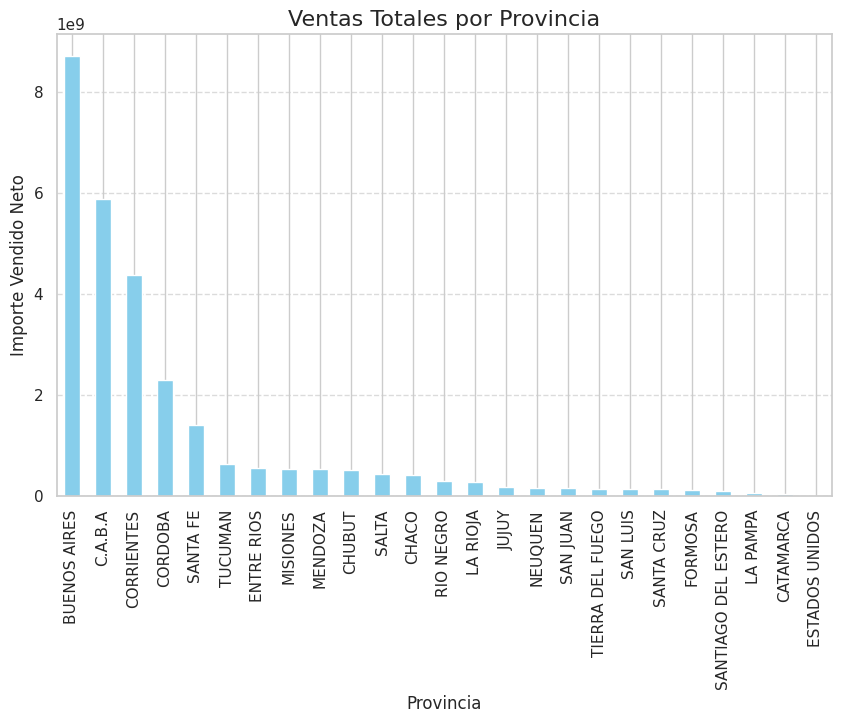

In [50]:
# Agrupar datos por provincia y sumar ventas
ventas_provincia = df.groupby('PROVINCIA')['IMPORTE_VENDIDO_NETO'].sum().sort_values(ascending=False)

# Crear el gráfico
plt.figure(figsize=(10, 6))
ventas_provincia.plot(kind='bar', color='skyblue')
plt.title('Ventas Totales por Provincia', fontsize=16)
plt.xlabel('Provincia', fontsize=12)
plt.ylabel('Importe Vendido Neto', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Gráfico de barras (Ventas por provincia): Muestra la distribución de las ventas totales por provincia.

In [51]:
import pandas as pd

# Crear una lista ordenada de los meses
orden_meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
               'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']

# Asegurarnos de que la columna Fecha.Mes está en minúsculas y sin espacios
df['Fecha.Mes'] = df['Fecha.Mes'].str.strip().str.lower()

# Convertir los meses en un tipo categórico con orden
df['Fecha.Mes'] = pd.Categorical(df['Fecha.Mes'], categories=orden_meses, ordered=True)

In [52]:
# Agrupar y sumar las ventas por año y mes
ventas_mensuales = df.groupby(['Fecha.Año', 'Fecha.Mes'])['IMPORTE_VENDIDO_NETO'].sum().reset_index()

# Ordenar el DataFrame por año y mes
ventas_mensuales = ventas_mensuales.sort_values(['Fecha.Año', 'Fecha.Mes'])

<ipython-input-52-b452ccaf3542>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_mensuales = df.groupby(['Fecha.Año', 'Fecha.Mes'])['IMPORTE_VENDIDO_NETO'].sum().reset_index()


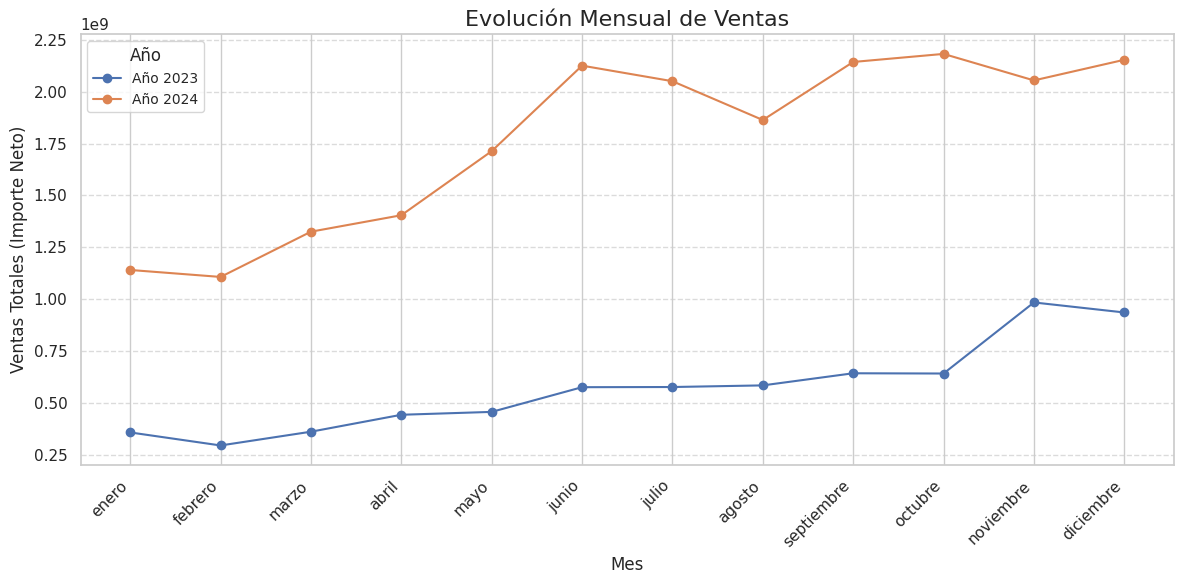

In [53]:
import matplotlib.pyplot as plt

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
for year in ventas_mensuales['Fecha.Año'].unique():
    data_anual = ventas_mensuales[ventas_mensuales['Fecha.Año'] == year]
    plt.plot(data_anual['Fecha.Mes'], data_anual['IMPORTE_VENDIDO_NETO'], marker='o', label=f'Año {year}')

# Personalizar el gráfico
plt.title('Evolución Mensual de Ventas', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas Totales (Importe Neto)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Año', fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Gráfico de líneas (Evolución mensual de ventas): Muestra la evolución de las ventas netas mes a mes.

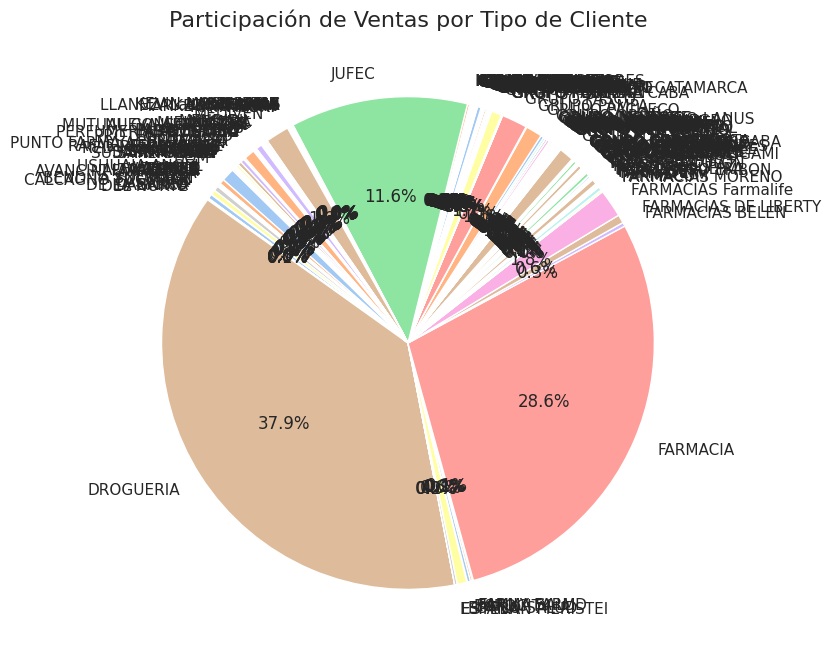

In [54]:
# Agrupar por tipo de cliente y sumar ventas
ventas_tipo_cliente = df.groupby('Tipo Cliente')['IMPORTE_VENDIDO_NETO'].sum()

# Crear el gráfico
plt.figure(figsize=(8, 8))
plt.pie(ventas_tipo_cliente, labels=ventas_tipo_cliente.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Participación de Ventas por Tipo de Cliente', fontsize=16)
plt.show()

Gráfico circular (Participación por tipo de cliente): Muestra la distribución de las ventas según el tipo de cliente.

In [62]:
# Agrupar por tipo de cliente y calcular el total de ventas
participacion_clientes = df.groupby('Tipo Cliente')['IMPORTE_VENDIDO_NETO'].sum()

# Calcular el porcentaje de participación
participacion_clientes = participacion_clientes / participacion_clientes.sum() * 100

# Ordenar de mayor a menor
participacion_clientes = participacion_clientes.sort_values(ascending=False)

In [74]:
# Top 5 clientes con mayor participación
top_5_mayores = participacion_clientes.head(5)

# Calcular la suma del resto
otros_mayores = participacion_clientes.iloc[5:].sum()

# Agregar "Otros" al Top 5
top_5_mayores['Otros'] = otros_mayores


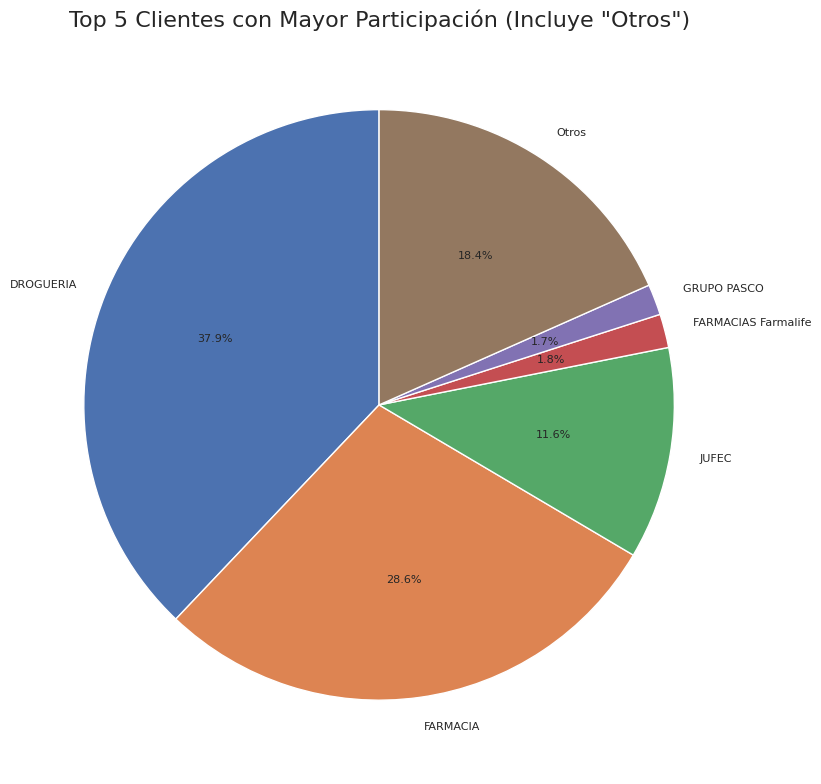

In [76]:
import matplotlib.pyplot as plt

# Crear el gráfico circular
plt.figure(figsize=(10, 8))
plt.pie(
    top_5_mayores,
    labels=top_5_mayores.index,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 8}
)

# Personalizar el gráfico
plt.title('Top 5 Clientes con Mayor Participación (Incluye "Otros")', fontsize=16)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Gráfico circular (Top 5 Participación por tipo de cliente): Muestra los 5 primeros Clientes segun su participacion

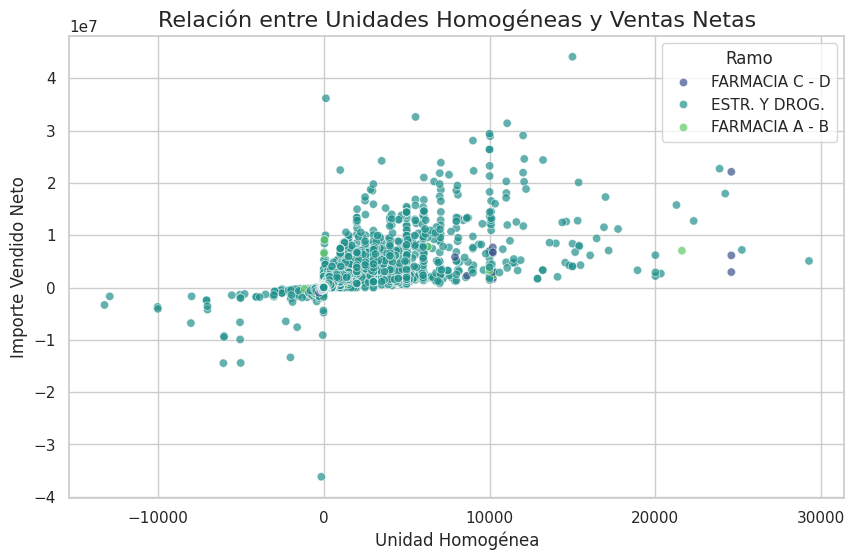

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Unidad Homogénea', y='IMPORTE_VENDIDO_NETO', hue='Ramo', palette='viridis', alpha=0.7)
plt.title('Relación entre Unidades Homogéneas y Ventas Netas', fontsize=16)
plt.xlabel('Unidad Homogénea', fontsize=12)
plt.ylabel('Importe Vendido Neto', fontsize=12)
plt.show()

Gráfico de dispersión (Relación entre unidades homogéneas y ventas netas): Muestra la relación entre las unidades homogéneas vendidas y las ventas netas, diferenciando por ramo.

<ipython-input-81-bad787029cda>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='FAMILIA', y='IMPORTE_VENDIDO_NETO', palette='Set3')


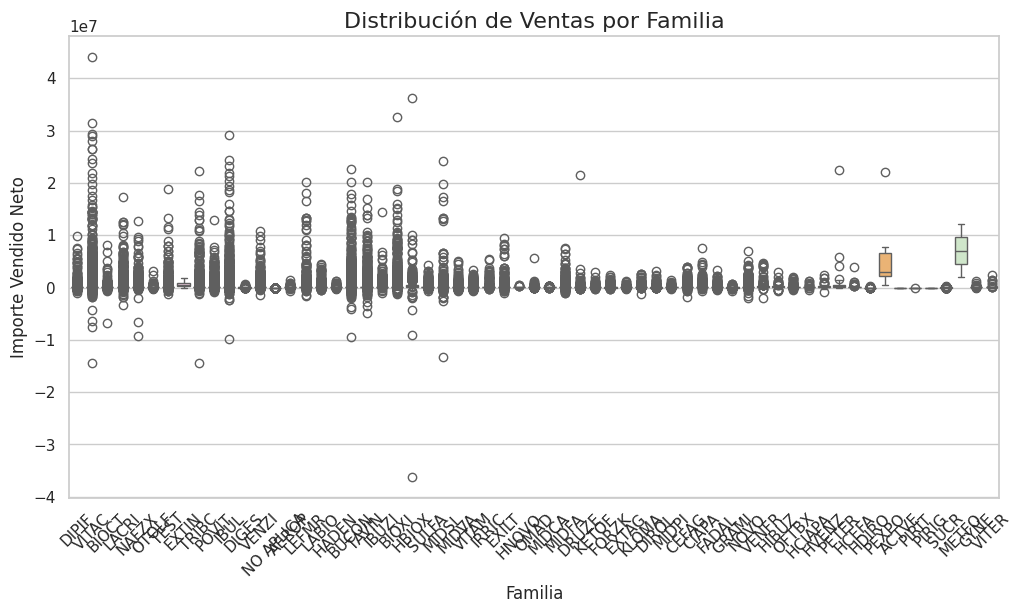

In [81]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='FAMILIA', y='IMPORTE_VENDIDO_NETO', palette='Set3')
plt.title('Distribución de Ventas por Familia', fontsize=16)
plt.xlabel('Familia', fontsize=12)
plt.ylabel('Importe Vendido Neto', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Boxplot (Distribución de ventas por familia): Muestra cómo se distribuyen las ventas dentro de las principales familias de productos.

In [85]:
# Agrupar por familia y calcular el total de ventas
ventas_familia = df.groupby('FAMILIA')['IMPORTE_VENDIDO_NETO'].sum()

# Ordenar las ventas de mayor a menor
ventas_familia = ventas_familia.sort_values(ascending=False)

In [94]:
# Seleccionar el Top 5 de familias
top_5_familias = ventas_familia.head(5)

# Calcular la suma del resto
otros = ventas_familia.iloc[10:].sum()

# Crear un nuevo DataFrame para el Top 5 y "Otros"
top_5_familias['Otros'] = otros

In [95]:
# Crear una copia del DataFrame original
df_modificado = df.copy()

# Reemplazar las familias fuera del Top 5 por "Otros"
df_modificado['FAMILIA'] = df_modificado['FAMILIA'].apply(
    lambda x: x if x in top_5_familias.index else 'Otros'
)

<ipython-input-96-11daee4a6886>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_modificado, x='FAMILIA', y='IMPORTE_VENDIDO_NETO', palette='viridis')


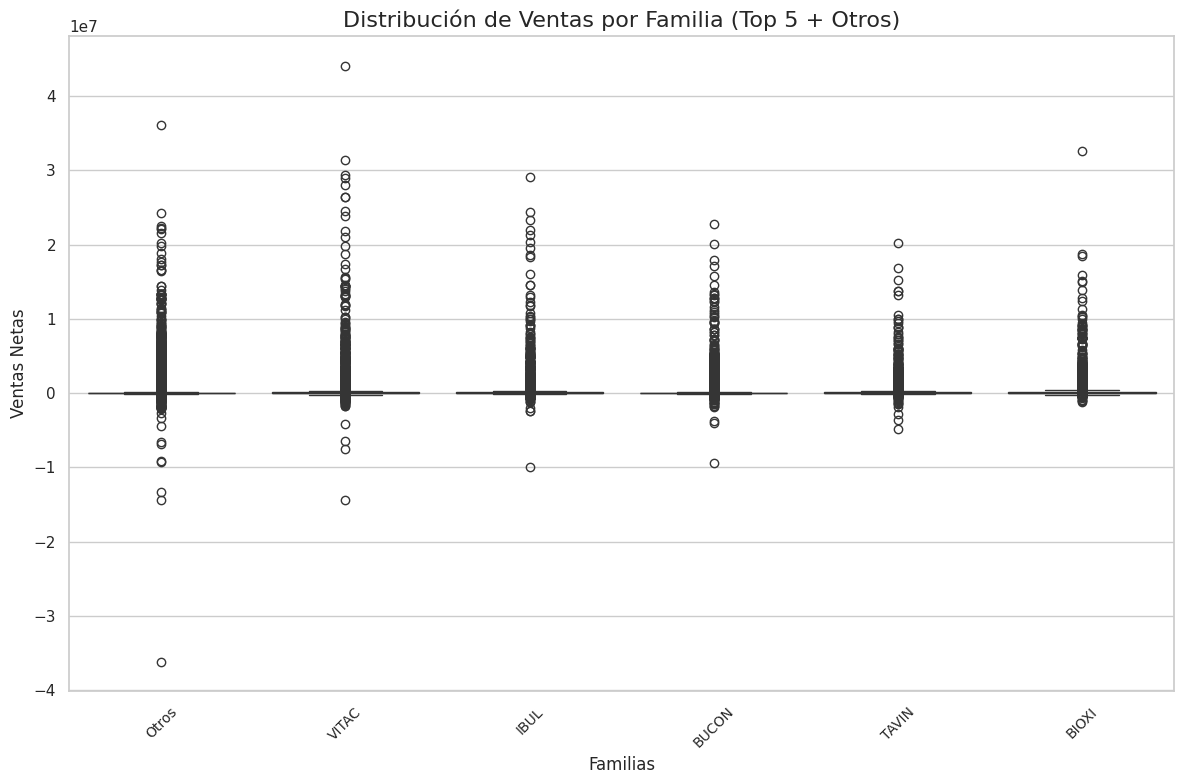

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_modificado, x='FAMILIA', y='IMPORTE_VENDIDO_NETO', palette='viridis')

# Personalizar el gráfico
plt.title('Distribución de Ventas por Familia (Top 5 + Otros)', fontsize=16)
plt.xlabel('Familias', fontsize=12)
plt.ylabel('Ventas Netas', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Boxplot (Top 5 Distribución de ventas por familia): Muestra cómo se distribuyen las ventas dentro del Top 5 familias de productos.

In [60]:
# Calcular la matriz de correlación
correlacion = df_numerico.corr()

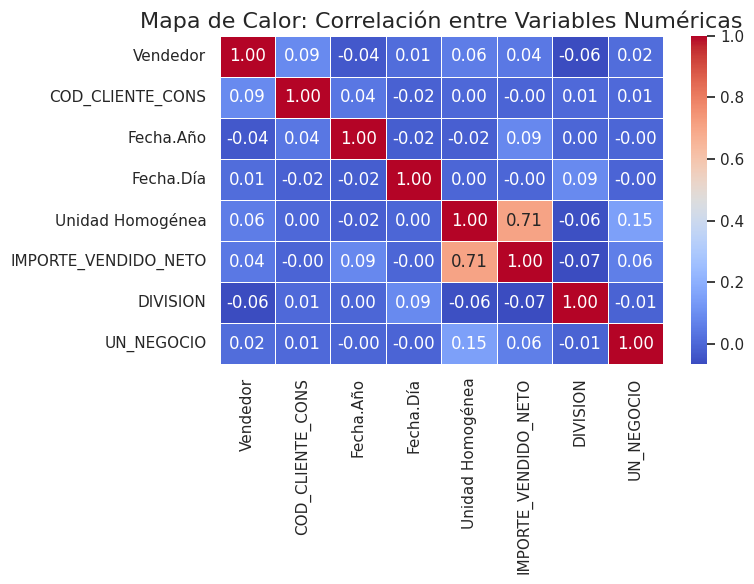

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)

# Personalizar el gráfico
plt.title('Mapa de Calor: Correlación entre Variables Numéricas', fontsize=16)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Heatmap (Correlación entre variables numéricas): Muestra la correlación entre las variables numéricas (ventas, unidades, etc.)

<ipython-input-97-3aa24332dab0>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ventas_provincia.index, rotation=45, ha='right')


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

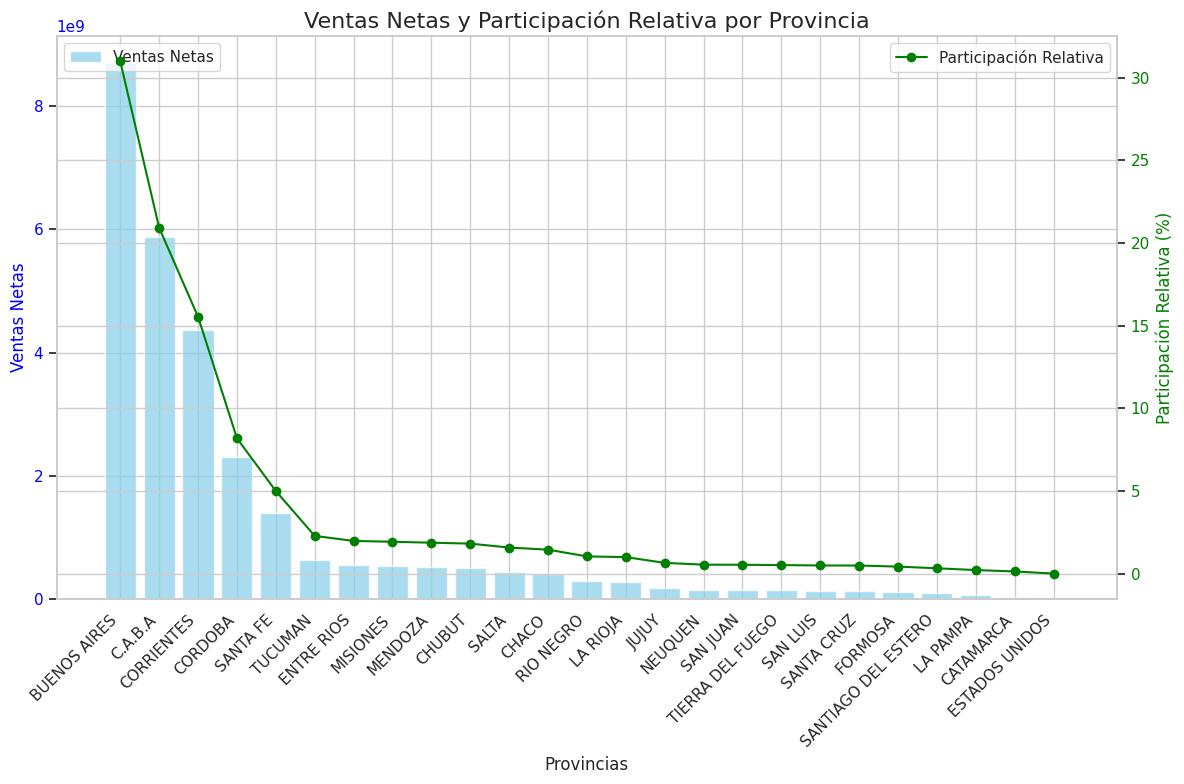

In [97]:
# Calcular el total de ventas por provincia
ventas_provincia = df.groupby('PROVINCIA')['IMPORTE_VENDIDO_NETO'].sum().sort_values(ascending=False)

# Calcular la participación relativa
participacion_provincia = (ventas_provincia / ventas_provincia.sum()) * 100

# Crear el gráfico combinado
fig, ax1 = plt.subplots(figsize=(12, 8))

# Gráfico de barras para ventas netas
ax1.bar(ventas_provincia.index, ventas_provincia, color='skyblue', alpha=0.7, label='Ventas Netas')
ax1.set_xlabel('Provincias', fontsize=12)
ax1.set_ylabel('Ventas Netas', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(ventas_provincia.index, rotation=45, ha='right')
ax1.legend(loc='upper left')

# Gráfico de líneas para participación relativa
ax2 = ax1.twinx()
ax2.plot(ventas_provincia.index, participacion_provincia, color='green', marker='o', label='Participación Relativa')
ax2.set_ylabel('Participación Relativa (%)', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

plt.title('Ventas Netas y Participación Relativa por Provincia', fontsize=16)
plt.tight_layout()
plt

In [58]:
# Mostrar el tipo de dato de cada columna
print(df.dtypes)

Vendedor                   int64
Tipo Cliente              object
COD_CLIENTE_CONS           int64
CLIE_CONS_NOMBRE          object
FAMILIA                   object
COD_ARTICULO              object
ART_NOMBRE                object
Fecha.Año                  int64
Fecha.Mes               category
Fecha.Día                  int64
Unidad Homogénea           int64
IMPORTE_VENDIDO_NETO     float64
PROVINCIA                 object
Cod_Ramo                  object
Ramo                      object
DIVISION                   int64
UN_NEGOCIO                 int64
dtype: object


In [59]:
# Seleccionar únicamente las columnas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Verificar el DataFrame numérico
print(df_numerico.head())

   Vendedor  COD_CLIENTE_CONS  Fecha.Año  Fecha.Día  Unidad Homogénea  \
0       329            107262       2023          2                10   
1       305            103953       2023          2                10   
2       314            104423       2023          6                60   
3       304            103689       2023          6                24   
4       329            102822       2023          6               -30   

   IMPORTE_VENDIDO_NETO  DIVISION  UN_NEGOCIO  
0               4878.62        91           1  
1               5060.45        91           1  
2              23615.56         1           1  
3               9966.99         1           1  
4              -5825.40         1           1  


Valores nulos por columna:
Vendedor                0
Tipo Cliente            0
COD_CLIENTE_CONS        0
CLIE_CONS_NOMBRE        0
FAMILIA                 0
COD_ARTICULO            0
ART_NOMBRE              0
Fecha.Año               0
Fecha.Mes               0
Fecha.Día               0
Unidad Homogénea        0
IMPORTE_VENDIDO_NETO    0
PROVINCIA               0
Cod_Ramo                0
Ramo                    0
DIVISION                0
UN_NEGOCIO              0
dtype: int64


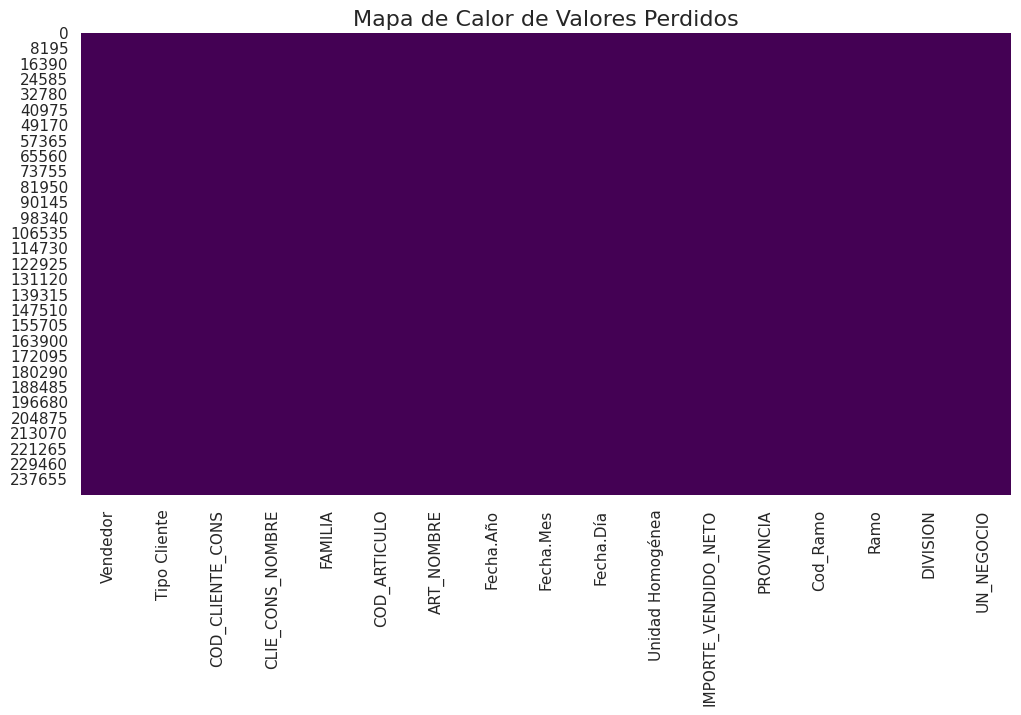

In [98]:
# Revisar valores nulos por columna
valores_nulos = df.isnull().sum()

# Mostrar el total de valores nulos en el dataset
print("Valores nulos por columna:")
print(valores_nulos)

# Visualizar valores perdidos con un heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Perdidos', fontsize=16)
plt.show()

# Vincular los gráficos y análisis numéricos con las preguntas de interés:

# Pregunta 1: ¿Cuáles son las provincias con mayor contribución a las ventas?
Gráfico vinculado: Gráfico de barras (Ventas por provincia)

Hipótesis: Las provincias más pobladas o con mayor densidad de farmacias y droguerías generarán la mayor parte de las ventas.

Análisis: Este gráfico nos muestra las provincias con mayores ventas. Si se observa que ciertas provincias generan la mayoría de las ventas, podemos confirmar la hipótesis de que las provincias más pobladas tienen una mayor contribución a las ventas.

Pregunta adicional: ¿Existen provincias con ventas altas pero con pocas farmacias o droguerías? Esto podría indicar la necesidad de expansión.

# Pregunta 2: ¿Cómo varía la evolución de las ventas a lo largo del tiempo?
Gráfico vinculado: Gráfico de líneas (Evolución mensual de ventas)

Hipótesis: Se espera que las ventas aumenten en ciertos meses debido a estacionalidades, promociones o eventos de ventas.

Análisis: Este gráfico revela las fluctuaciones mensuales de ventas. Si observamos picos en ciertos meses, podríamos vincularlo con campañas de marketing, promociones o estacionalidades.

Pregunta adicional: ¿Hay una tendencia alcista en las ventas durante los meses de invierno o verano? Esto podría estar relacionado con cambios estacionales en la demanda de productos farmacéuticos.

# Pregunta 3: ¿Qué tipo de cliente genera el mayor volumen de ventas?
Gráfico vinculado: Gráfico circular (Participación por tipo de cliente)

Hipótesis: Las farmacias generarán el mayor volumen de ventas debido a la alta demanda de productos farmacéuticos.

Análisis: Este gráfico muestra la participación de cada tipo de cliente. Si las farmacias representan la mayor parte de las ventas, la hipótesis sería confirmada.

Pregunta adicional: ¿Hay algún tipo de cliente con una participación relativamente pequeña pero con crecimiento potencial? Esto puede indicar nichos a explorar.

# Pregunta 4: ¿Existe una relación significativa entre las unidades homogéneas vendidas y el importe neto de ventas?
Gráfico vinculado: Gráfico de dispersión (Relación entre unidades homogéneas y ventas netas)

Hipótesis: A mayor cantidad de unidades homogéneas vendidas, mayor será el importe neto de ventas, con ciertas diferencias según el ramo.

Análisis: El gráfico debe mostrar si existe una correlación entre las unidades homogéneas y las ventas netas. Si es positiva, esto sugiere que aumentar las unidades vendidas tiene un impacto directo en las ventas totales.

Pregunta adicional: ¿Existen ramos con alta venta de unidades pero baja contribución en ventas netas? Este patrón podría indicar que los precios de ciertos productos son bajos o que los márgenes de ganancia no son altos.

# Pregunta 5: ¿Qué familias de productos concentran la mayor parte de las ventas?
Gráfico vinculado: Boxplot (Distribución de ventas por familia)

Hipótesis: Las familias más populares (por ejemplo, productos de salud o de cuidado personal) deberían concentrar las mayores ventas.

Análisis: Este gráfico ayuda a identificar qué familias tienen mayores ventas, pero también muestra la dispersión en las ventas dentro de cada familia. Algunas familias tienen un alto porcentaje de ventas, mientras que otras son más dispersas.

Pregunta adicional: ¿Las familias con mayor dispersión tienen productos con precios más bajos? Este análisis puede revelar cómo las familias de productos más diversas afectan las ventas totales.

# Pregunta 6: ¿Qué tan fuerte es la correlación entre las variables numéricas clave como las ventas y las unidades vendidas?
Gráfico vinculado: Heatmap (Correlación entre variables numéricas)

Hipótesis: Las ventas netas deberían estar positivamente correlacionadas con las unidades vendidas.

Análisis: El heatmap muestra la fuerza de la correlación entre las variables numéricas. Si hay una fuerte correlación entre unidades vendidas e importe neto, esto apoya la hipótesis de que vender más unidades incrementa las ventas netas.

Pregunta adicional: ¿Existen variables que no se correlacionan tan fuertemente con las ventas? Esto podría indicar que hay otros factores a considerar, como la ubicación geográfica o la promoción de productos.

In [100]:
from google.colab import drive
drive.mount('/content/drive')  # Monta tu Google Drive para guardar la notebook

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
